In [4]:
import numpy as np
from Pre_Processing_Function import preprocess_text
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

In [5]:
# Define the paths to the positive and negative reviews
pos_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Review\rt-polaritydata\rt-polaritydata\rt-polarity_pos.txt'
neg_reviews_path = r'D:\Gethub\Sentiment-Analysis-of-Movie-Review\rt-polaritydata\rt-polaritydata\rt-polarity_neg.txt'

# Extract reviews from Folders
def read_files_from_directory(reviews_path):
    with open(reviews_path, 'r', encoding='ISO-8859-1') as file:
        # Read each line and store it in a list
        reviews = [line.strip() for line in file]
    return reviews

In [6]:
# Read the positive and negative reviews
original_pos_reviews = read_files_from_directory(pos_reviews_path)
original_neg_reviews = read_files_from_directory(neg_reviews_path)

# Preprocess the reviews
positive_reviews = preprocess_text(original_pos_reviews)
negative_reviews = preprocess_text(original_neg_reviews)

In [7]:
# Create labels for the reviews
labels = []
for i in range(len(positive_reviews)):
    labels.append(1)
for i in range(len(negative_reviews)):
    labels.append(0)

In [8]:
# Preprocess the reviews for Word2Vec
preprocessed_reviews = positive_reviews + negative_reviews

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=preprocessed_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Transform each review into a fixed-size vector by averaging the word vectors
word_vectors = np.array([np.mean([word2vec_model.wv[word] for word in review], axis=0) for review in preprocessed_reviews])
y = labels

In [9]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(word_vectors, y, test_size=0.2, random_state=42, shuffle=True)


In [10]:
def eval_model(classifier, model_name):
    # Evaluate the model
    predictions = classifier.predict(X_test)
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, predictions)
    # Print the accuracy of the model
    print(model_name, " Test Accuracy:", accuracy * 100, "%")
    # Calculate Precision, Recall, F1 Score
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    # Print Precision, Recall, F1 Score
    print(model_name, " Precision:", precision * 100, "%")
    print(model_name, " Recall:", recall * 100, "%")
    print(model_name, " F1 Score:", f1 * 100, "%")
    return accuracy, precision, recall, f1

In [11]:
# Train Logistic Regression
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)
# Evaluate Logistic Regression
lr_accuracy, lr_precision, lr_recall, lr_f1 = eval_model(lr_classifier, "Logistic Regression")

Logistic Regression  Test Accuracy: 52.078774617067836 %
Logistic Regression  Precision: 53.29052969502408 %
Logistic Regression  Recall: 41.11455108359133 %
Logistic Regression  F1 Score: 46.41733659559595 %


In [12]:
# Train Support Vector Machine
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)
# Evaluate Support Vector Machine
svm_accuracy, svm_precision, svm_recall, svm_f1 = eval_model(svm_classifier, "Support Vector Machine")

Support Vector Machine  Test Accuracy: 49.734291966239454 %
Support Vector Machine  Precision: 50.48543689320388 %
Support Vector Machine  Recall: 22.538699690402478 %
Support Vector Machine  F1 Score: 31.164383561643838 %


In [13]:
# Train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
# Evaluate Random Forest
rf_accuracy, rf_precision, rf_recall, rf_f1 = eval_model(rf_classifier, "Random Forest")

Random Forest  Test Accuracy: 52.797749296655205 %
Random Forest  Precision: 53.44714379514117 %
Random Forest  Recall: 50.40247678018576 %
Random Forest  F1 Score: 51.88017845761631 %


In [14]:
# Train Gradient Boosting Machine
gbm_classifier = GradientBoostingClassifier(n_estimators=100, random_state=42)
gbm_classifier.fit(X_train, y_train)
# Evaluate Gradient Boosting Machine
gbm_accuracy, gbm_precision, gbm_recall, gbm_f1 = eval_model(gbm_classifier, "Gradient Boosting Machine")

Gradient Boosting Machine  Test Accuracy: 50.89090340731478 %
Gradient Boosting Machine  Precision: 51.376720901126404 %
Gradient Boosting Machine  Recall: 50.835913312693506 %
Gradient Boosting Machine  F1 Score: 51.10488639900404 %


In [15]:
# Define lists to store performance metrics for each model
models = ['LR', 'SVM', 'RF', 'GBM']
accuracies = [lr_accuracy, svm_accuracy, rf_accuracy, gbm_accuracy]
precisions = [lr_precision, svm_precision, rf_precision, gbm_precision]
recalls = [lr_recall, svm_recall, rf_recall, gbm_recall]
f1_scores = [lr_f1, svm_f1, rf_f1, gbm_f1]

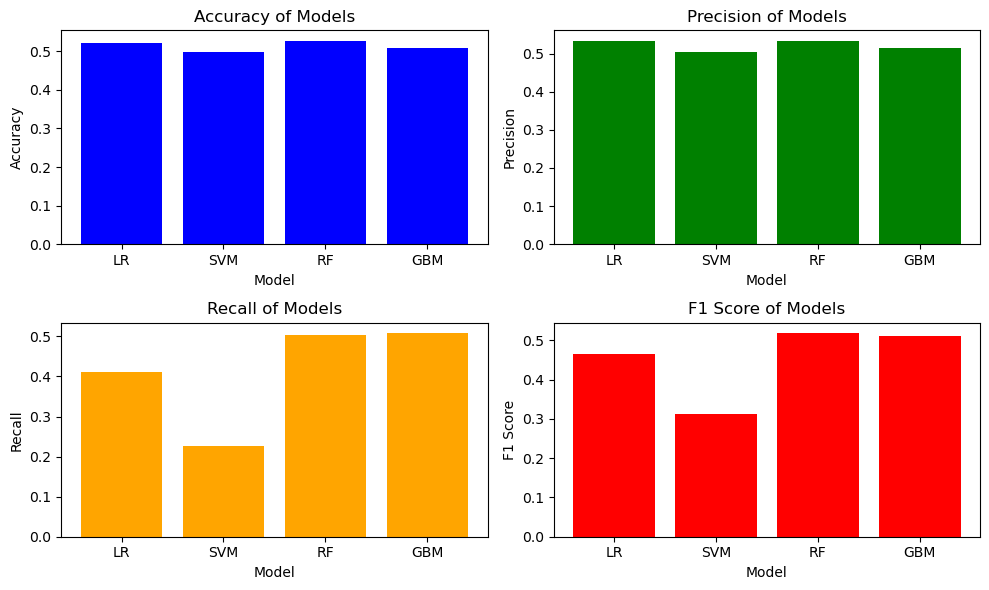

In [16]:
# Plot performance metrics for each model
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy of Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')

plt.subplot(2, 2, 2)
plt.bar(models, precisions, color='green')
plt.title('Precision of Models')
plt.xlabel('Model')
plt.ylabel('Precision')

plt.subplot(2, 2, 3)
plt.bar(models, recalls, color='orange')
plt.title('Recall of Models')
plt.xlabel('Model')
plt.ylabel('Recall')

plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='red')
plt.title('F1 Score of Models')
plt.xlabel('Model')
plt.ylabel('F1 Score')

plt.tight_layout()
plt.show()